# Use Keras (on top of TensorFlow) to Detect Images and Display Probabilities

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
#learn more about ResNet50 here:  https://www.kaggle.com/keras/resnet50

#import these libraries if you plan to read images from a URL
#import requests
#from io import BytesIO

Using TensorFlow backend.
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

# Define Image Size and Perform Prediction

In [2]:
model = ResNet50(weights='imagenet')
target_size = (224, 224)

def predict(model, img, target_size, top_n=5):
  """Run model prediction on an image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
    top_n: # of top predictions to return
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return decode_predictions(preds, top=top_n)[0]

Instructions for updating:
Colocations handled automatically by placer.


# Display Image and Probabilities

In [3]:
def plot_preds(image, preds):
  """Displays predicted image and the top-n predicted probabilities using a horizontal bar graph
  Args:
    image: PIL image, Python Imaging Library
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure(figsize=(3,3))
  order = list(reversed(range(len(preds))))
  bar_preds = [pr[2] for pr in preds]
  labels = (pr[1] for pr in preds)
  plt.barh(order, bar_preds, alpha=1.0)
  plt.yticks(order, labels)
  plt.xlabel('Probability of Image Match')
  plt.xlim(0,1)
  plt.show()

# Run Program with Images

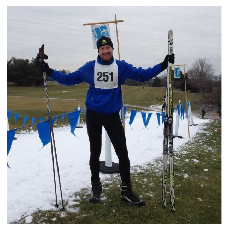

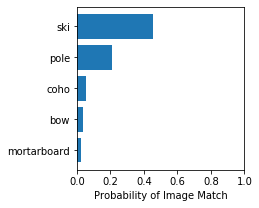

In [4]:
if __name__=="__main__":

  img = Image.open('C:\\Users\\John\\Images\\JohnSkiRace.jpg')
  preds = predict(model, img, target_size)
  plot_preds(img, preds)

  #use this code if reading images from a URL
  #response = requests.get('http://i.imgur.com/wpxMwsR.jpg')
  #img = Image.open(BytesIO(response.content))
  #preds = predict(model, img, target_size)
  #plot_preds(img, preds)